In [2]:
# Step 1: Import processed dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
import os

# Ensure directories exist
os.makedirs("../output/images", exist_ok=True)
os.makedirs("../output/models", exist_ok=True)

# Load dataset (after feature engineering)
df = pd.read_csv("../output/fico_style_features.csv")

# Replace infinite and missing values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)

print(f"Dataset loaded: {df.shape[0]} samples, {df.shape[1]} features")
print(f"Total missing values after cleaning: {df.isna().sum().sum()}")


Dataset loaded: 307511 samples, 15 features
Total missing values after cleaning: 0


In [3]:
# Step 2: Define input features and target variable
X = df.drop(columns=["SK_ID_CURR", "TARGET"])
y = df["TARGET"]

# Split dataset into train and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


Train samples: 215257, Test samples: 92254


In [4]:
# Step 3: Initialize model
model = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=42,
    solver="lbfgs"
)

# Step 4: Standardize features and train model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
print("Model trained successfully!")


Model trained successfully!


In [5]:
# Step 5: Evaluate performance
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Compute key metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_proba)
}

print("\nModel Evaluation Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Evaluation Metrics:
Accuracy: 0.5867
Precision: 0.1146
Recall: 0.6126
F1-Score: 0.1931
ROC-AUC: 0.6412

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72     84806
           1       0.11      0.61      0.19      7448

    accuracy                           0.59     92254
   macro avg       0.53      0.60      0.46     92254
weighted avg       0.88      0.59      0.68     92254



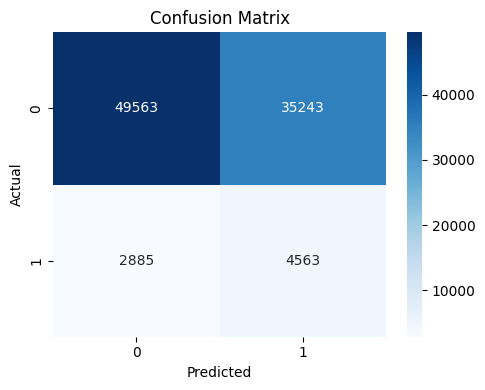

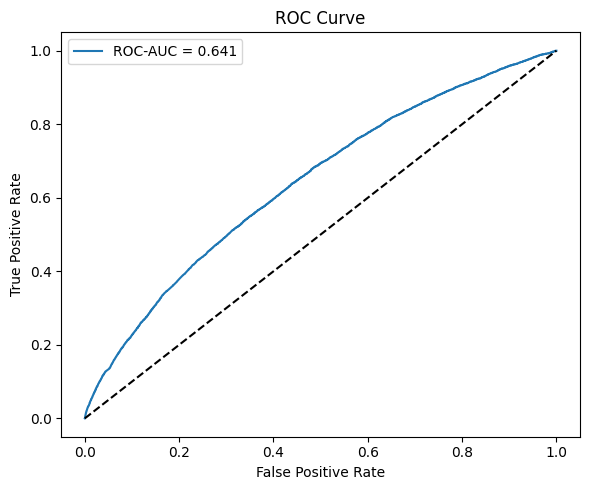

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("../output/images/confusion_matrix.png", dpi=300)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {metrics['ROC-AUC']:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig("../output/images/roc_curve.png", dpi=300)
plt.show()


In [7]:
# Save trained model and scaler for future use
joblib.dump(model, "../output/models/logistic_model.pkl")
joblib.dump(scaler, "../output/models/scaler.pkl")

print("Model and scaler saved successfully in ./output/models/")


Model and scaler saved successfully in ./output/models/
